# 1. Baseline
라이브러리와 데이터 불러오기

In [1]:
# 라이브러리 
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

# 2. EDA(탐색적 데이터 분석)
탐색적으로 데이터 살펴보기

In [2]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [3]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [4]:
# 데이터 타입
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [5]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

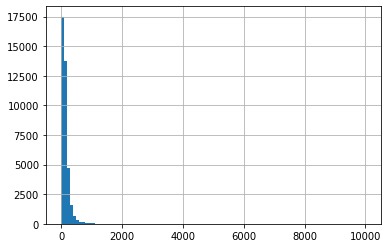

In [7]:
# target(hist)
train['price'].hist(bins=100)

In [8]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [9]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

# 3. 데이터 전처리
데이터를 살펴보고 판단하여 결측치 및 이상치를 처리

In [12]:
# 결측치 컬럼 삭제(last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [13]:
# 결측치 채우기 _unknown, 최소값으로 채움
train.isnull().sum()
train['name'] = train['name'].fillna('unknown')
train['host_name'] = train['host_name'].fillna('unknown')
train['reviews_per_month'] = train['reviews_per_month'].fillna(train['reviews_per_month'].min())
train

test.isnull().sum()
test['name'] = test['name'].fillna('unknown')
test['host_name'] = test['host_name'].fillna('unknown')
test['reviews_per_month'] = test['reviews_per_month'].fillna(test['reviews_per_month'].min())
test

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,4.31,3,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,16024539,"Beautiful Greenpoint, Brooklyn apt by the park",1622733,Cristina,Brooklyn,Greenpoint,40.72413,-73.95090,Entire home/apt,2,14,0.70,1,93
9775,35235326,New private studio & separate entry for adults,96659533,Angelica,Brooklyn,Bushwick,40.69447,-73.91364,Private room,2,5,4.17,2,301
9776,33471805,Comfortable Room with Private Bath - 15 min to...,252191305,Marion,Queens,Cambria Heights,40.69090,-73.73193,Private room,1,34,11.21,1,61
9777,28534405,New york Multi-unit building,2891643,Jacqueline,Manhattan,Harlem,40.82146,-73.94598,Private room,1,0,0.01,1,0


In [14]:
# 결측치 확인
train.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
# 가격 값 복사 - target이라는 변수에 train의 price를 가져오고 train에서는 가격 drop
target = train['price']
target

train = train.drop('price', axis=1)

In [16]:
# 수치형 피처 선택 
train.info()
cols = [
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]
train = train[cols]
test = test[cols]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39116 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39116 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  reviews_per_month               39116 non-null  float64
 12  calculated_host_listings_count  

# 4. 검증 데이터 분리
Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측

In [17]:
# 검증 데이터 분리
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=1004)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

# 5. 머신러닝
<참고> : 6. 지도학습(회귀) 노드에서 프로젝트에 활용된 회귀 모델을 복습하실 수 있습니다.

In [18]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

54421.902188839944

In [19]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

# 1 -> 54425.68896787327
# 10 -> 54474.31809174555
# 0.5 -> 54423.98687200829

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.01856e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


54421.905202335285

In [20]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

# 1 -> 55149.66864464383
# 10 -> 56028.13461646593
# 0.1 -> 54438.75562435859

54421.978947000374

In [21]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.00001, l1_ratio=0.9)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

# alpha=1, l1_ratio=0.5 -> 55981.54527179201

54421.99746909835

In [22]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

48403.92205829499

In [29]:
# Xgboost
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

# 하이퍼파라미터
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=5, n_jobs=-1)
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [26]:
grid.best_params_

{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.07}

In [30]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.07,
    max_depth = 3,
    n_estimators = 100,
    subsample = 0.8
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
mean_squared_error(y_val, pred)

50435.878897743176

# 6. 채점

In [31]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

49208.65014181408

In [35]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요! 
print("나의 점수는 (MSE 49208.65014181408)입니다.")

나의 점수는 (MSE 49208.65014181408)입니다.
